In [1]:
import string
from langdetect import detect
import lyricsgenius
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
from adjustText import adjust_text
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from scrape_genius import get_lyrics_from_dataframe
from make_diff_graph import make_diff_graph
from make_time_graph import make_time_graph

In [2]:
df_grammys = pd.read_csv('grammy_df.csv')

In [10]:
get_lyrics_from_dataframe(df_grammys, 'yCZEZPMfq_-XZBsxCS2x1UKScfpa48rnKgTGaHwOsiv6DAzdtFUqCZWdrVQakSb5')

some exception at title: 0
some exception at artist: 0
some exception at winner: 0
some exception at year: 0


UnboundLocalError: local variable 'merged_df' referenced before assignment

In [3]:
merged_df = pd.read_csv('genius_grammy.csv')

In [4]:
merged_df.dropna(inplace=True)

In [5]:
merged_df.title.nunique()

343

In [6]:
merged_df

,title,artist,winner,year,lyrics
0,Nel Blu Dipinto Di Blu (Volare),Domenico Modugno,1,1958,Nel blu dipinto di blu (Volare) Lyrics[Testo d...
1,Catch A Falling Star,Perry Como,0,1958,Catch a Falling Star Lyrics[Chorus]\nCatch a f...
2,Witchcraft (Single),Frank Sinatra,0,1958,Sweetest Maleficia Lyrics[Gilles de Rais:]\nI ...
3,The Chipmunk Song,David Seville And The Chipmunks,0,1958,The Chipmunk song Lyrics[Dave:] Alright you Ch...
4,Fever (Single),Peggy Lee,0,1958,Jaden Smith Discography Lyrics2012\nFlame (Jus...
...,...,...,...,...,...
343,Woman,Doja Cat,0,2022,TranslationsTürkçeEspañolPortuguêsItalianoΕλλη...
344,You And Me On The Rock,Brandi Carlile Featuring Lucius,0,2022,You and Me On The Rock Lyrics[Verse 1]\nThey b...
345,Good Morning Gorgeous,Mary J. Blige,0,2022,"Good Morning Gorgeous Lyrics[Intro]\nOoh\nOoh,..."
346,Easy On Me,Adele,0,2022,TranslationsTürkçeไทย / Phasa ThaiSvenskaEspañ...


In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    # Tokenize the text into individual words
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

    # Stem the words (optional)
    porter = nltk.PorterStemmer()
    stemmed_tokens = [porter.stem(token) for token in filtered_tokens]

    # Join the tokens back into a single string
    preprocessed_text = ' '.join(stemmed_tokens)
    return preprocessed_text

merged_df['preprocessed_lyrics'] = merged_df['lyrics'].apply(preprocess_text)


In [8]:
# Identify language of each lyric using langdetect
merged_df['language'] = merged_df['preprocessed_lyrics'].apply(detect)

# Filter out non-English lyrics
df_english = merged_df[merged_df['language'] == 'en']


In [ ]:
df_english.dropna(axis=1, inplace=True)

if df_english['preprocessed_lyrics'].dtype != 'object':
    df_english['preprocessed_lyrics'] = df_english['preprocessed_lyrics'].astype(str)

<ipython-input-9-dc9897342879>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_english.dropna(axis=1, inplace=True)


In [ ]:
df_english

,title,artist,winner,year,lyrics,preprocessed_lyrics,language
1,Catch A Falling Star,Perry Como,0,1958,Catch a Falling Star Lyrics[Chorus]\nCatch a f...,catch fall star lyric [ choru ] catch fall sta...,en
2,Witchcraft (Single),Frank Sinatra,0,1958,Sweetest Maleficia Lyrics[Gilles de Rais:]\nI ...,sweetest maleficia lyric [ gill de rai : ] con...,en
3,The Chipmunk Song,David Seville And The Chipmunks,0,1958,The Chipmunk song Lyrics[Dave:] Alright you Ch...,chipmunk song lyric [ dave : ] alright chipmun...,en
4,Fever (Single),Peggy Lee,0,1958,Jaden Smith Discography Lyrics2012\nFlame (Jus...,jaden smith discographi lyrics2012 flame ( cuz...,en
5,Mack The Knife,Bobby Darin,1,1959,"Mack the Knife LyricsOh the shark, babe, has s...","mack knife lyricsoh shark , babe , teeth , dea...",en
...,...,...,...,...,...,...,...
343,Woman,Doja Cat,0,2022,TranslationsTürkçeEspañolPortuguêsItalianoΕλλη...,translationstürkçeespañolportuguêsitalianoελλη...,en
344,You And Me On The Rock,Brandi Carlile Featuring Lucius,0,2022,You and Me On The Rock Lyrics[Verse 1]\nThey b...,rock lyric [ vers 1 ] build wooden hous frozen...,en
345,Good Morning Gorgeous,Mary J. Blige,0,2022,"Good Morning Gorgeous Lyrics[Intro]\nOoh\nOoh,...","good morn gorgeou lyric [ intro ] ooh ooh , oo...",en
346,Easy On Me,Adele,0,2022,TranslationsTürkçeไทย / Phasa ThaiSvenskaEspañ...,translationstürkçeไทย / phasa thaisvenskaespañ...,en


In [ ]:
def read_lexicon(filename):
    word_sentiments = {}

    # Parse lexicon file
    with open(filename, 'r') as f:
        for line in f:
            # Ignore blank lines
            if line.strip():
                word, sentiment, value = line.split()
                if value == '1':
                    # Add sentiment to dictionary
                    cur_list = word_sentiments.get(word, [])
                    cur_list.append(sentiment)
                    word_sentiments[word] = cur_list

    return word_sentiments

In [ ]:
def get_sentiment_percentages(track_df, sentiment):
    sentiment_pcts = []

    # Parse tracks
    for title in track_df.index.values:
        num_sentiment_words = 0
        all_words = str(track_df.loc[title]['preprocessed_lyrics']).split()

        # Parse words in lyrics
        for word in all_words:
            if sentiment in word_sentiments_dict.get(word, []):
                num_sentiment_words += 1

        sentiment_pcts.append(num_sentiment_words/len(all_words))

    return pd.DataFrame(data=sentiment_pcts, index=track_df.index.values, columns=[sentiment + '_pct'])


In [ ]:
#Initialize sentiment dictionary and track dataframe
word_sentiments_dict = read_lexicon('lexicon.txt')

#Generate sentiment percentages based on NRC Lexicon sentiments
sentiments = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust']
for sentiment  in sentiments:
    sentiment_df = get_sentiment_percentages(df_english, sentiment)
    df_english = df_english.join(sentiment_df)

In [ ]:
# Calculate the weighted average of the sentiment percentages for each row in the DataFrame
weights = [0.1, 0.5, 0.1, 0.5, 0.1, 0.1, 0.1, 0.1, 0.1]
sentiments = ['negative_pct',
              'sadness_pct',
              'disgust_pct',
              'fear_pct',
              'anticipation_pct',
              'joy_pct', 
              'surprise_pct',
              'trust_pct',
              'anger_pct']
df_english[sentiments] = df_english[sentiments].replace(0, 0.000001) # take care of 0s
df_english['gloom_index'] = (df_english[sentiments] * weights).sum(axis=1)

# Rescale the 'gloom_index' column to a range of 0 to 100
max_gloom_value = df_english['gloom_index'].max()
min_gloom_value = df_english['gloom_index'].min()
df_english['gloom_index'] = (df_english['gloom_index'] - min_gloom_value) / (max_gloom_value - min_gloom_value) * 100

# Sort the DataFrame by the 'gloom_index' column in descending order
df_english.sort_values(by='gloom_index', ascending=False, inplace=True)



In [ ]:
df_english[sentiments]

,negative_pct,sadness_pct,disgust_pct,fear_pct,anticipation_pct,joy_pct,surprise_pct,trust_pct,anger_pct
178,0.117647,0.076923,0.052036,0.095023,0.067873,0.049774,0.033937,0.063348,0.047511
311,0.087963,0.087963,0.074074,0.074074,0.027778,0.023148,0.013889,0.023148,0.074074
83,0.100000,0.081250,0.025000,0.081250,0.050000,0.037500,0.012500,0.043750,0.018750
241,0.101266,0.084388,0.054852,0.063291,0.054852,0.037975,0.012658,0.042194,0.054852
2,0.097643,0.063973,0.060606,0.080808,0.050505,0.037037,0.016835,0.047138,0.047138
...,...,...,...,...,...,...,...,...,...
36,0.000001,0.000001,0.000001,0.000001,0.030612,0.020408,0.020408,0.000001,0.000001
111,0.027027,0.000001,0.000001,0.000001,0.020270,0.013514,0.000001,0.006757,0.000001
92,0.003356,0.003356,0.003356,0.003356,0.003356,0.000001,0.003356,0.003356,0.003356
160,0.006494,0.000001,0.000001,0.000001,0.006494,0.006494,0.000001,0.012987,0.000001


In [ ]:
df_english.drop_duplicates(['title','artist', 'year'], inplace=True)

In [ ]:
df_english.sort_values(['gloom_index'], ascending=False)

,title,artist,winner,year,lyrics,preprocessed_lyrics,language,anger_pct,anticipation_pct,disgust_pct,fear_pct,joy_pct,negative_pct,positive_pct,sadness_pct,surprise_pct,trust_pct,gloom_index
178,If I Ever Lose My Faith In You (Single),Sting,0,1993,Sorrow (syrup rmx) LyricsYea\nUh huh\nAbstract...,sorrow ( syrup rmx ) lyricsyea Uh huh abstract...,en,0.047511,0.067873,0.052036,0.095023,0.049774,0.117647,0.088235,0.076923,0.033937,0.063348,100.000000
311,Bad Guy,Billie Eilish,1,2019,TranslationsHrvatskiTürkçeSvenskaEspañolРусски...,translationshrvatskitürkçesvenskaespañolрусски...,en,0.074074,0.027778,0.074074,0.074074,0.023148,0.087963,0.023148,0.087963,0.013889,0.023148,87.623281
83,Help Me (Single),Joni Mitchell,0,1974,Lilith Lyrics[Verse 1]\nSeptember\nDont rain o...,lilith lyric [ vers 1 ] septemb dont rain dont...,en,0.018750,0.050000,0.025000,0.081250,0.037500,0.100000,0.050000,0.081250,0.012500,0.043750,84.932747
241,Not Ready To Make Nice,Dixie Chicks,1,2006,Not Ready to Make Nice Lyrics[Verse 1]\nForgiv...,"readi make nice lyric [ vers 1 ] forgiv , soun...",en,0.054852,0.054852,0.054852,0.063291,0.037975,0.101266,0.042194,0.084388,0.012658,0.042194,84.700788
2,Witchcraft (Single),Frank Sinatra,0,1958,Sweetest Maleficia Lyrics[Gilles de Rais:]\nI ...,sweetest maleficia lyric [ gill de rai : ] con...,en,0.047138,0.050505,0.060606,0.080808,0.037037,0.097643,0.067340,0.063973,0.016835,0.047138,83.425519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,A Taste Of Honey,Herb Alpert And The Tijuana Brass,1,1965,A Taste of Honey Lyrics[Intro]\nA taste of hon...,tast honey lyric [ intro ] tast honey ! tast m...,en,0.000001,0.030612,0.000001,0.000001,0.020408,0.000001,0.112245,0.000001,0.020408,0.000001,4.155500
111,Sailing,Christopher Cross,1,1980,"Sailing Lyrics[Verse 1]\nWell, it's not far do...","sail lyric [ vers 1 ] well , 's far paradis le...",en,0.000001,0.020270,0.000001,0.000001,0.013514,0.027027,0.033784,0.000001,0.000001,0.006757,3.852200
92,If You Leave Me Now (Single),Chicago,0,1976,TranslationsTürkçeIf You Leave Me Now Lyrics[I...,translationstürkçeif leav lyric [ intro : char...,en,0.003356,0.003356,0.003356,0.003356,0.000001,0.003356,0.006711,0.003356,0.003356,0.003356,2.761490
160,She Drives Me Crazy (Single),Fine Young Cannibals,0,1989,She Drives Me Crazy (single remix) LyricsI can...,drive crazi ( singl remix ) lyricsi ca n't sto...,en,0.000001,0.006494,0.000001,0.000001,0.006494,0.006494,0.019481,0.000001,0.000001,0.012987,1.095636


In [ ]:
# clean 0 gloom index
df_english

,title,artist,winner,year,lyrics,preprocessed_lyrics,language,anger_pct,anticipation_pct,disgust_pct,fear_pct,joy_pct,negative_pct,positive_pct,sadness_pct,surprise_pct,trust_pct,gloom_index
178,If I Ever Lose My Faith In You (Single),Sting,0,1993,Sorrow (syrup rmx) LyricsYea\nUh huh\nAbstract...,sorrow ( syrup rmx ) lyricsyea Uh huh abstract...,en,0.047511,0.067873,0.052036,0.095023,0.049774,0.117647,0.088235,0.076923,0.033937,0.063348,100.000000
311,Bad Guy,Billie Eilish,1,2019,TranslationsHrvatskiTürkçeSvenskaEspañolРусски...,translationshrvatskitürkçesvenskaespañolрусски...,en,0.074074,0.027778,0.074074,0.074074,0.023148,0.087963,0.023148,0.087963,0.013889,0.023148,87.623281
83,Help Me (Single),Joni Mitchell,0,1974,Lilith Lyrics[Verse 1]\nSeptember\nDont rain o...,lilith lyric [ vers 1 ] septemb dont rain dont...,en,0.018750,0.050000,0.025000,0.081250,0.037500,0.100000,0.050000,0.081250,0.012500,0.043750,84.932747
241,Not Ready To Make Nice,Dixie Chicks,1,2006,Not Ready to Make Nice Lyrics[Verse 1]\nForgiv...,"readi make nice lyric [ vers 1 ] forgiv , soun...",en,0.054852,0.054852,0.054852,0.063291,0.037975,0.101266,0.042194,0.084388,0.012658,0.042194,84.700788
2,Witchcraft (Single),Frank Sinatra,0,1958,Sweetest Maleficia Lyrics[Gilles de Rais:]\nI ...,sweetest maleficia lyric [ gill de rai : ] con...,en,0.047138,0.050505,0.060606,0.080808,0.037037,0.097643,0.067340,0.063973,0.016835,0.047138,83.425519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,A Taste Of Honey,Herb Alpert And The Tijuana Brass,1,1965,A Taste of Honey Lyrics[Intro]\nA taste of hon...,tast honey lyric [ intro ] tast honey ! tast m...,en,0.000001,0.030612,0.000001,0.000001,0.020408,0.000001,0.112245,0.000001,0.020408,0.000001,4.155500
111,Sailing,Christopher Cross,1,1980,"Sailing Lyrics[Verse 1]\nWell, it's not far do...","sail lyric [ vers 1 ] well , 's far paradis le...",en,0.000001,0.020270,0.000001,0.000001,0.013514,0.027027,0.033784,0.000001,0.000001,0.006757,3.852200
92,If You Leave Me Now (Single),Chicago,0,1976,TranslationsTürkçeIf You Leave Me Now Lyrics[I...,translationstürkçeif leav lyric [ intro : char...,en,0.003356,0.003356,0.003356,0.003356,0.000001,0.003356,0.006711,0.003356,0.003356,0.003356,2.761490
160,She Drives Me Crazy (Single),Fine Young Cannibals,0,1989,She Drives Me Crazy (single remix) LyricsI can...,drive crazi ( singl remix ) lyricsi ca n't sto...,en,0.000001,0.006494,0.000001,0.000001,0.006494,0.006494,0.019481,0.000001,0.000001,0.012987,1.095636


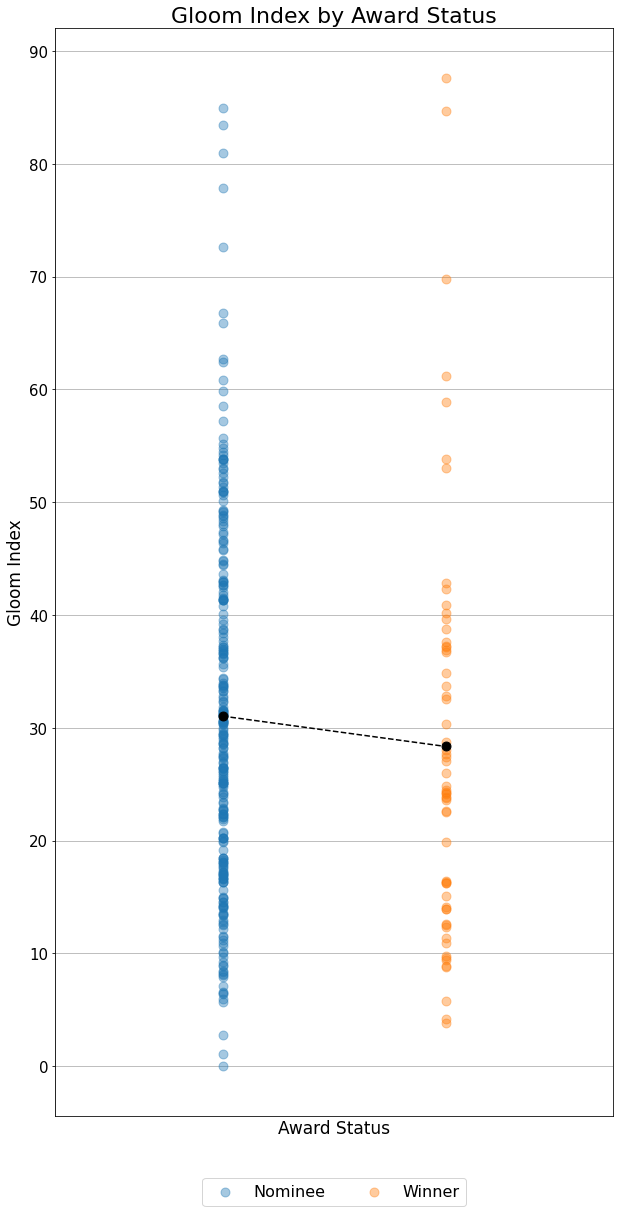

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [ ]:
make_diff_graph(df_english)

In [ ]:
make_time_graph(df_english)

NameError: name 'df_english' is not defined